# Exploratory Data Analysis for Crimes in Chicago in 2017-2018

The objective of this project is to build a model which can predict where in Chicago crimes will occur.

In [1]:
import pandas as pd
import numpy as np
import boto3

In [2]:
data = pd.read_csv("../../Data/crimes_data.csv", index_col = "ID")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
pd.set_option('display.max_columns', 30)

data.head()

Case Number                    Date                Block  IUCR  \
ID                                                                       
6360476    HP446021  07/10/2008 03:30:00 PM   062XX N PULASKI RD  1330   
6360477    HP447110  07/10/2008 09:30:00 PM    065XX W SCHOOL ST  1310   
6360479    HP447237  07/11/2008 10:46:00 PM    078XX S COLES AVE  1330   
6360480    HP447133  07/11/2008 11:00:00 PM      047XX W ERIE ST  0460   
6360481    HP447448  07/12/2008 02:12:00 AM  047XX S LOOMIS BLVD  2022   

              Primary Type    Description               Location Description  \
ID                                                                             
6360476  CRIMINAL TRESPASS        TO LAND                              OTHER   
6360477    CRIMINAL DAMAGE    TO PROPERTY                   RESIDENCE-GARAGE   
6360479  CRIMINAL TRESPASS        TO LAND  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   
6360480            BATTERY         SIMPLE            RESIDENCE PORCH/HALLWAY   
6360481          NARCOTICS  POSS: COCAINE                           SIDEWALK   

         Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  \
ID                                                                         
6360476   False     False  1711      17.0  39.0            12.0       26   
6360477   False     False  1632      16.0  36.0            17.0       14   
6360479    True     False   421       4.0   7.0            43.0       26   
6360480   False     False  1111      11.0  28.0            25.0      08B   
6360481    True     False   933       9.0  20.0            61.0       18   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
ID                                                                             
6360476     1148560.0     1941124.0  2008  02/28/2018 03:56:25 PM  41.994386   
6360477     1132019.0     1921224.0  2008  02/28/2018 03:56:25 PM  41.940082   
6360479     1197284.0     1853978.0  2008  02/28/2018 03:56:25 PM  41.754172   
6360480     1144594.0     1903891.0  2008  02/28/2018 03:56:25 PM  41.892291   
6360481     1167799.0     1873226.0  2008  02/28/2018 03:56:25 PM  41.807675   

         Longitude                       Location  
ID                                                 
6360476 -87.728891  (41.994385737, -87.728890617)  
6360477 -87.790201  (41.940082399, -87.790200793)  
6360479 -87.552581  (41.754172384, -87.552581097)  
6360480 -87.744420  (41.892290925, -87.744420446)  
6360481 -87.660081  (41.807674727, -87.660081178)

## Formatting date

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [5]:
data.head()

Case Number                Date                Block  IUCR  \
ID                                                                   
6360476    HP446021 2008-07-10 15:30:00   062XX N PULASKI RD  1330   
6360477    HP447110 2008-07-10 21:30:00    065XX W SCHOOL ST  1310   
6360479    HP447237 2008-07-11 22:46:00    078XX S COLES AVE  1330   
6360480    HP447133 2008-07-11 23:00:00      047XX W ERIE ST  0460   
6360481    HP447448 2008-07-12 02:12:00  047XX S LOOMIS BLVD  2022   

              Primary Type    Description               Location Description  \
ID                                                                             
6360476  CRIMINAL TRESPASS        TO LAND                              OTHER   
6360477    CRIMINAL DAMAGE    TO PROPERTY                   RESIDENCE-GARAGE   
6360479  CRIMINAL TRESPASS        TO LAND  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   
6360480            BATTERY         SIMPLE            RESIDENCE PORCH/HALLWAY   
6360481          NARCOTICS  POSS: COCAINE                           SIDEWALK   

         Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  \
ID                                                                         
6360476   False     False  1711      17.0  39.0            12.0       26   
6360477   False     False  1632      16.0  36.0            17.0       14   
6360479    True     False   421       4.0   7.0            43.0       26   
6360480   False     False  1111      11.0  28.0            25.0      08B   
6360481    True     False   933       9.0  20.0            61.0       18   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
ID                                                                             
6360476     1148560.0     1941124.0  2008  02/28/2018 03:56:25 PM  41.994386   
6360477     1132019.0     1921224.0  2008  02/28/2018 03:56:25 PM  41.940082   
6360479     1197284.0     1853978.0  2008  02/28/2018 03:56:25 PM  41.754172   
6360480     1144594.0     1903891.0  2008  02/28/2018 03:56:25 PM  41.892291   
6360481     1167799.0     1873226.0  2008  02/28/2018 03:56:25 PM  41.807675   

         Longitude                       Location  
ID                                                 
6360476 -87.728891  (41.994385737, -87.728890617)  
6360477 -87.790201  (41.940082399, -87.790200793)  
6360479 -87.552581  (41.754172384, -87.552581097)  
6360480 -87.744420  (41.892290925, -87.744420446)  
6360481 -87.660081  (41.807674727, -87.660081178)

In [6]:
data = data[data['Date'] >= '01/01/2017'].drop_duplicates()

In [7]:
data.shape

(577059, 21)

In [8]:
%matplotlib inline

data[data['Date'].dt.year == 2017]["Primary Type"].value_counts()[:10]

THEFT                  64343
BATTERY                49215
CRIMINAL DAMAGE        29041
ASSAULT                19301
DECEPTIVE PRACTICE     18996
OTHER OFFENSE          17225
BURGLARY               13001
ROBBERY                11877
NARCOTICS              11658
MOTOR VEHICLE THEFT    11407
Name: Primary Type, dtype: int64

In [9]:
data[data['Date'].dt.year == 2018]["Primary Type"].value_counts()[:10]

THEFT                  65051
BATTERY                49780
CRIMINAL DAMAGE        27801
ASSAULT                20376
DECEPTIVE PRACTICE     18627
OTHER OFFENSE          17109
NARCOTICS              12938
BURGLARY               11725
MOTOR VEHICLE THEFT     9990
ROBBERY                 9683
Name: Primary Type, dtype: int64

In [10]:
classes_to_use = [
    'KIDNAPPING',
    'SEXUAL ASSAULT',
    'HOMICIDE',
    'MOTOR VEHICLE THEFT',
    'WEAPONS VIOLATION',
    'BATTERY',
    'THEFT'
    ]

In [11]:
data = data[data['Primary Type'].isin(classes_to_use)]

In [12]:
data['BlockID'] = data['Block'].map(lambda block: block.split()[0])

In [13]:
block_lat_map = data.groupby('Block')['Latitude'].mean().to_dict()
block_long_map = data.groupby('Block')['Longitude'].mean().to_dict()

In [14]:
data['Latitude'] = data[['Block', 'Latitude']].apply(lambda row: 
        block_lat_map[row[0]] if np.isnan(row[1]) 
        else row[1], axis=1)

In [15]:
data['Longitude'] = data[['Block', 'Longitude']].apply(lambda row: block_long_map[row[0]] if np.isnan(row[1]) else row[1], axis=1)

In [16]:
block_lat_map = data.groupby('BlockID')['Latitude'].mean().to_dict()
block_long_map = data.groupby('BlockID')['Longitude'].mean().to_dict()

In [17]:
data['Latitude'] = data[['BlockID', 'Latitude']].apply(lambda row: 
        block_lat_map[row[0]] if np.isnan(row[1]) 
        else row[1], axis=1)
data['Longitude'] = data[['BlockID', 'Longitude']].apply(lambda row: block_long_map[row[0]] if np.isnan(row[1]) else row[1], axis=1)

In [18]:
from sklearn.cluster import KMeans

latlong = data[['Latitude', 'Longitude']]

kmeans = KMeans(n_clusters=20, n_jobs=-1)
kmeans.fit(latlong)
data['cluster'] = kmeans.predict(latlong)

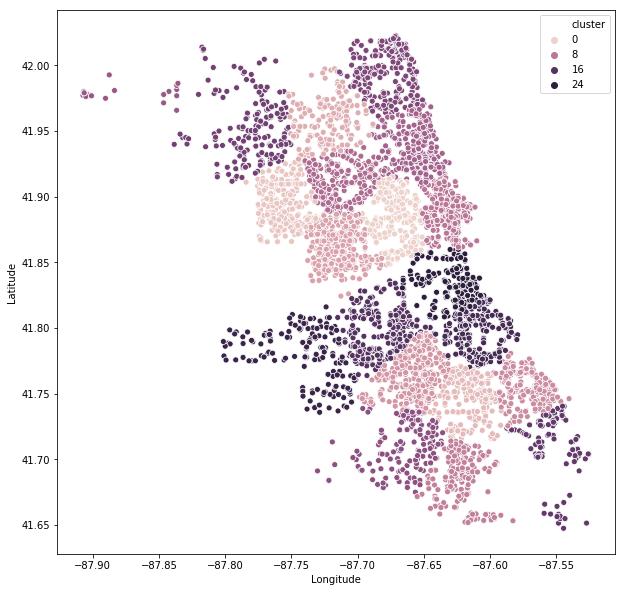

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=data.sample(5000))

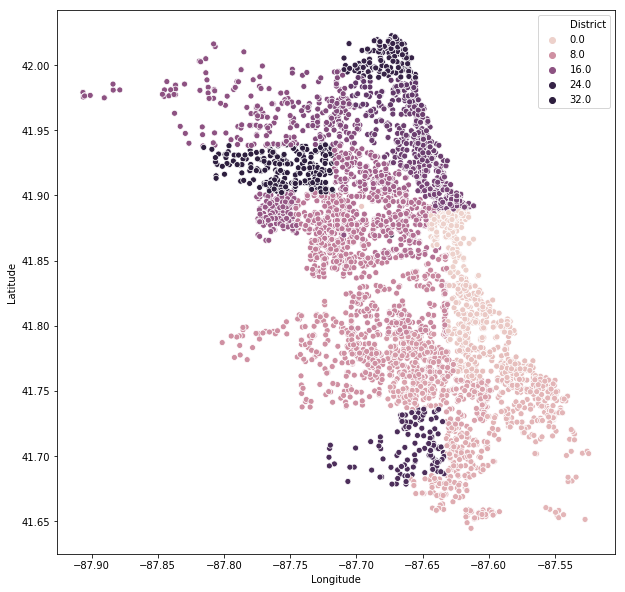

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='District', data=data.sample(5000))

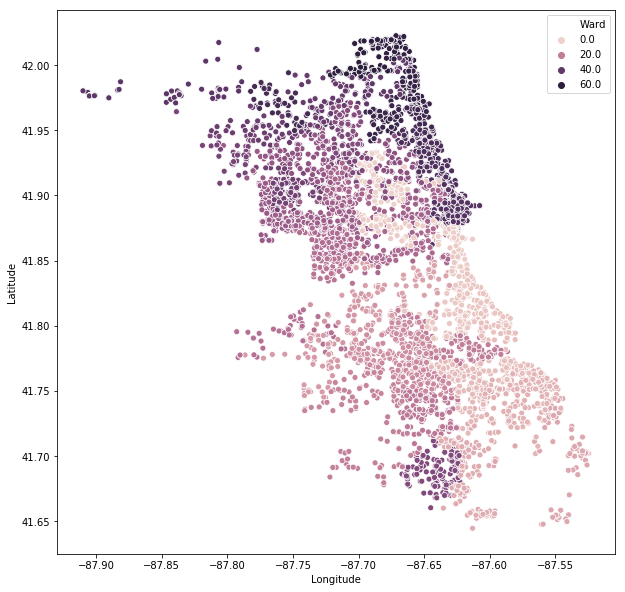

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Ward', data=data.sample(5000))

In [22]:
data['hour'] = data['Date'].dt.hour

In [23]:
data.head(5)

Case Number                Date                  Block  IUCR  \
ID                                                                      
11207956    JB120346 2018-01-18 09:35:00  076XX S VINCENNES AVE  0486   
11236178    JB159602 2018-02-21 00:40:00     037XX W ADDISON ST  041A   
11236225    JB159680 2018-02-21 06:00:00     012XX W MADISON ST  0910   
11236335    JB159893 2018-02-21 08:00:00    072XX S ROCKWELL ST  0820   
11236443    JB159674 2018-02-21 06:30:00   019XX S ST LOUIS AVE  0497   

                 Primary Type                                     Description  \
ID                                                                              
11207956              BATTERY                         DOMESTIC BATTERY SIMPLE   
11236178              BATTERY                             AGGRAVATED: HANDGUN   
11236225  MOTOR VEHICLE THEFT                                      AUTOMOBILE   
11236335                THEFT                                  $500 AND UNDER   
11236443              BATTERY  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON   

         Location Description  Arrest  Domestic  Beat  District  Ward  \
ID                                                                      
11207956               STREET    True     False   623       6.0  17.0   
11236178               STREET   False     False  1732      17.0  30.0   
11236225               STREET   False     False  1224      12.0  27.0   
11236335               STREET   False     False   831       8.0  18.0   
11236443            APARTMENT   False      True  1024      10.0  24.0   

          Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
ID                                                                    
11207956            69.0      08B     1175515.0     1854490.0  2018   
11236178            16.0      04B     1150919.0     1923677.0  2018   
11236225            28.0       07     1168157.0     1900169.0  2018   
11236335            66.0       06     1160291.0     1856647.0  2018   
11236443            29.0      04B     1153407.0     1890187.0  2018   

                      Updated On   Latitude  Longitude  \
ID                                                       
11207956  05/04/2018 03:51:04 PM  41.756092 -87.632341   
11236178  05/04/2018 03:51:04 PM  41.946464 -87.720672   
11236225  05/04/2018 03:51:04 PM  41.881601 -87.657991   
11236335  05/04/2018 03:51:04 PM  41.762338 -87.688075   
11236443  05/04/2018 03:51:04 PM  41.854515 -87.712418   

                               Location BlockID  cluster  hour  
ID                                                              
11207956  (41.756091788, -87.632341337)   076XX        2     9  
11236178  (41.946464013, -87.720672053)   037XX        3     0  
11236225  (41.881601096, -87.657991057)   012XX        0     6  
11236335  (41.762337776, -87.688074906)   072XX        5     8  
11236443  (41.854515128, -87.712417842)   019XX        4     6

In [24]:
cols_to_drop = ['Case Number', 'IUCR', 'Description', 
                'Arrest', 'Domestic', 'FBI Code',
                'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Location']

In [25]:
data['BlockID'].unique().shape

(139,)

In [26]:
data['month'] = data['Date'].dt.month

In [27]:
data.drop(cols_to_drop, axis=1).head()

Date                  Block         Primary Type  \
ID                                                                         
11207956 2018-01-18 09:35:00  076XX S VINCENNES AVE              BATTERY   
11236178 2018-02-21 00:40:00     037XX W ADDISON ST              BATTERY   
11236225 2018-02-21 06:00:00     012XX W MADISON ST  MOTOR VEHICLE THEFT   
11236335 2018-02-21 08:00:00    072XX S ROCKWELL ST                THEFT   
11236443 2018-02-21 06:30:00   019XX S ST LOUIS AVE              BATTERY   

         Location Description  Beat  District  Ward  Community Area  \
ID                                                                    
11207956               STREET   623       6.0  17.0            69.0   
11236178               STREET  1732      17.0  30.0            16.0   
11236225               STREET  1224      12.0  27.0            28.0   
11236335               STREET   831       8.0  18.0            66.0   
11236443            APARTMENT  1024      10.0  24.0            29.0   

           Latitude  Longitude BlockID  cluster  hour  month  
ID                                                            
11207956  41.756092 -87.632341   076XX        2     9      1  
11236178  41.946464 -87.720672   037XX        3     0      2  
11236225  41.881601 -87.657991   012XX        0     6      2  
11236335  41.762338 -87.688075   072XX        5     8      2  
11236443  41.854515 -87.712418   019XX        4     6      2

In [28]:
import boto3
from io import StringIO

bucket = 'sagemaker-us-east-1-023375022819'
csv_buffer = StringIO()
data.drop(cols_to_drop, axis=1).to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'victor-kwak/df.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'E75EF039DD4F58CC',
  'HostId': 'YbPAjwvpApsqC0vrsW3+ZNAHZIrtsTAFNXxLP+rNE33EvqbNKmdftZHf0PmrJPTBGin1QHQl/B4=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'YbPAjwvpApsqC0vrsW3+ZNAHZIrtsTAFNXxLP+rNE33EvqbNKmdftZHf0PmrJPTBGin1QHQl/B4=',
   'x-amz-request-id': 'E75EF039DD4F58CC',
   'date': 'Thu, 21 Mar 2019 15:51:29 GMT',
   'etag': '"6974902d7242b7b80411d2063b1f5669"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"6974902d7242b7b80411d2063b1f5669"'}